In [1]:
import matplotlib.pyplot as plt
import numpy as np

c_radius = 0.5

In [13]:
def draw_circle(xy, c_radius, color_i = [0, 0, 0]):
    circle = plt.Circle(xy, radius=c_radius, fill=True, color=color_i)
    plt.gca().add_patch(circle)

In [3]:
def axis_layer(input_layer_node_num):
    c_radius = 0.5
    layer_node_num = input_layer_node_num
    layer_nude_dist = 0.5
    layer_group_dist = 2
    e_space = np.sum(layer_node_num) / len(layer_node_num) * (c_radius * 2 + layer_nude_dist) - layer_nude_dist

    t_space = []
    for a in range(len(layer_node_num)):
        e_space = layer_node_num[a] * (c_radius * 2 + layer_nude_dist) - layer_nude_dist
        cent_p = np.arange(0.5, e_space, c_radius * 2 + layer_nude_dist)
        t_space.append(cent_p)
    
    tt = []
    for a in range(len(t_space)):
        tt.append(t_space[a][::-1][0])
    
    f_space = t_space[0]
    for a in range(1, len(layer_node_num)):
        temp = t_space[a]
        ttemp = tt[a-1]
        temp2 = temp + ttemp + c_radius + layer_group_dist
        f_space = np.append(f_space, temp2)

    return f_space

In [4]:
def adj_axis(t_dd):
    leng_t = []
    for a in range(len(t_dd)):
        leng = t_dd[a][::-1][0]
        leng_t.append(leng)
    
    max_leng = np.max(leng_t)

    ad_leng = []
    for a in range(len(t_dd)):
        temp = max_leng - leng_t[a]
        ad_leng.append(temp / 2)

    ad_t = []
    for a in range(len(t_dd)):
        ad_dd = t_dd[a] + ad_leng[a]
        ad_t.append(ad_dd)

    return ad_t

In [6]:
dd1 = axis_layer([3,3])
dd2 = axis_layer([4])

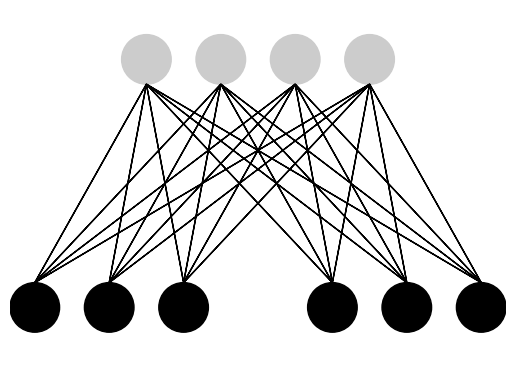

In [20]:
ad_t = adj_axis([dd1, dd2])

fig, ax = plt.subplots()

y = 1
for a in range(len(ad_t)):
    if a == 0:
        color_i=[0,0,0]
    elif a == 1:
        color_i=[0.8,0.8,0.8]
    for b in range(len(ad_t[a])):
        draw_circle([ad_t[a][b], y], c_radius, color_i)
    y = y + 5

for a in range(len(ad_t)-1):
    temp = ad_t[a]
    temp2 = ad_t[a+1]
    
    for b in range(len(temp)):
        for c in range(len(temp2)):

            X=temp[b]; Y=1.5
            dX=temp2[c]-X; dY=5.5-Y
            
            plt.arrow(
                    x=X, y=Y,
                    dx=dX, dy=dY,
                    width=0.0001,
                    # head_width=0.15,
                    # overhang=0,
                    facecolor=[0.5,0.5,0.5])

plt.axis('square')
plt.ylim(0, 7)
plt.xlim(0, 10)
ax.axis('off')

plt.savefig('netfig.jpg', dpi=300)